In [1]:
from collections import defaultdict
import glob
from itertools import groupby
import operator
import os
import re

import numpy as np
import pandas as pd
import pickle
import random
import sparse
#import tensorly as tl
#import tensorly.decomposition as decomp
import sktensor
import urllib3
#import wget

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

if not os.path.exists('cp_orth.py'):
    wget.download('http://web.stanford.edu/~vsharan/cp_orth.py')
from cp_orth import orth_als

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def show_expers(sepatate_preverb=False, feature='exectimes'):
    projdir = '/mnt/permanent/home/makrai/project/verb-tensor//'
    tabular = []
    mx = []
    for filen in glob.glob(os.path.join(projdir, '{}/decomp_*.pkl').format(
        'prev_sep' if sepatate_preverb else 'sktensor')):
        _, cutoff, dim = os.path.splitext(filen)[0].rsplit('_', 2)
        cutoff, dim = map(int, (cutoff, dim))
        ktensor, fit, n_iterations, exectimes = pickle.load(open(filen, mode='rb'))
        tabular.append((cutoff, dim, ktensor.shape))
        mx.append([cutoff, dim, sum(exectimes)/60/60])
    mx = np.array(mx)
    print('\n'.join(map(str, sorted(tabular, reverse=True))))
    plt.scatter(np.array(mx).T[0], mx.T[1], c=mx.T[2], norm=matplotlib.colors.LogNorm())
    plt.colorbar()
    plt.xscale('log')

(131072, 3, (3, 11, 5))
(32768, 10, (24, 85, 16))
(16384, 25, (87, 185, 43))
(16384, 20, (87, 185, 43))
(16384, 10, (87, 185, 43))
(16384, 5, (87, 185, 43))
(16384, 4, (87, 185, 43))
(16384, 3, (87, 185, 43))
(8192, 100, (278, 414, 101))
(8192, 5, (278, 414, 101))
(8192, 4, (278, 414, 101))
(8192, 3, (278, 414, 101))
(4096, 100, (622, 773, 243))
(4096, 10, (622, 773, 243))
(4096, 5, (622, 773, 243))
(4096, 4, (622, 773, 243))
(4096, 3, (622, 773, 243))
(2048, 100, (1251, 1293, 579))
(2048, 50, (1251, 1293, 579))
(2048, 10, (1251, 1293, 579))
(2048, 6, (1251, 1293, 579))
(2048, 5, (1251, 1293, 579))
(2048, 4, (1251, 1293, 579))
(2048, 3, (1251, 1293, 579))
(1024, 100, (2489, 2084, 1196))
(1024, 50, (2489, 2084, 1196))
(1024, 5, (2489, 2084, 1196))
(1024, 4, (2489, 2084, 1196))
(1024, 3, (2489, 2084, 1196))
(512, 100, (4598, 3269, 2183))
(512, 50, (4598, 3269, 2183))
(512, 4, (4598, 3269, 2183))
(512, 3, (4598, 3269, 2183))
(256, 100, (7957, 5054, 3740))
(256, 50, (7957, 5054, 3740))
(25

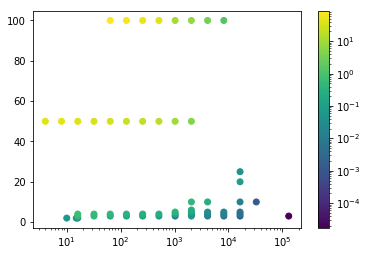

In [3]:
_ = show_expers()

(131072, 3, (3, 9, 19, 5))
(131072, 2, (3, 9, 19, 5))
(65536, 5, (10, 15, 48, 9))
(65536, 4, (10, 15, 48, 9))
(65536, 3, (10, 15, 48, 9))
(65536, 2, (10, 15, 48, 9))
(32768, 10, (24, 16, 120, 16))
(32768, 5, (24, 16, 120, 16))
(32768, 3, (24, 16, 120, 16))
(32768, 2, (24, 16, 120, 16))
(16384, 2, (87, 25, 219, 43))
(8192, 2, (278, 33, 384, 101))
(4096, 2, (622, 48, 616, 243))
(2048, 50, (1251, 58, 898, 579))
(2048, 25, (1251, 58, 898, 579))
(2048, 10, (1251, 58, 898, 579))
(2048, 5, (1251, 58, 898, 579))
(2048, 3, (1251, 58, 898, 579))
(2048, 2, (1251, 58, 898, 579))
(1024, 50, (2489, 67, 1358, 1196))


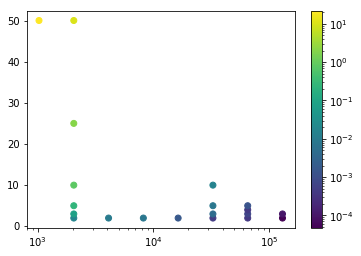

In [4]:
_ = show_expers(sepatate_preverb=True)